## LLM Finetuning and Agentic Workflows Hands-On
by Nilanjan Sinhababu

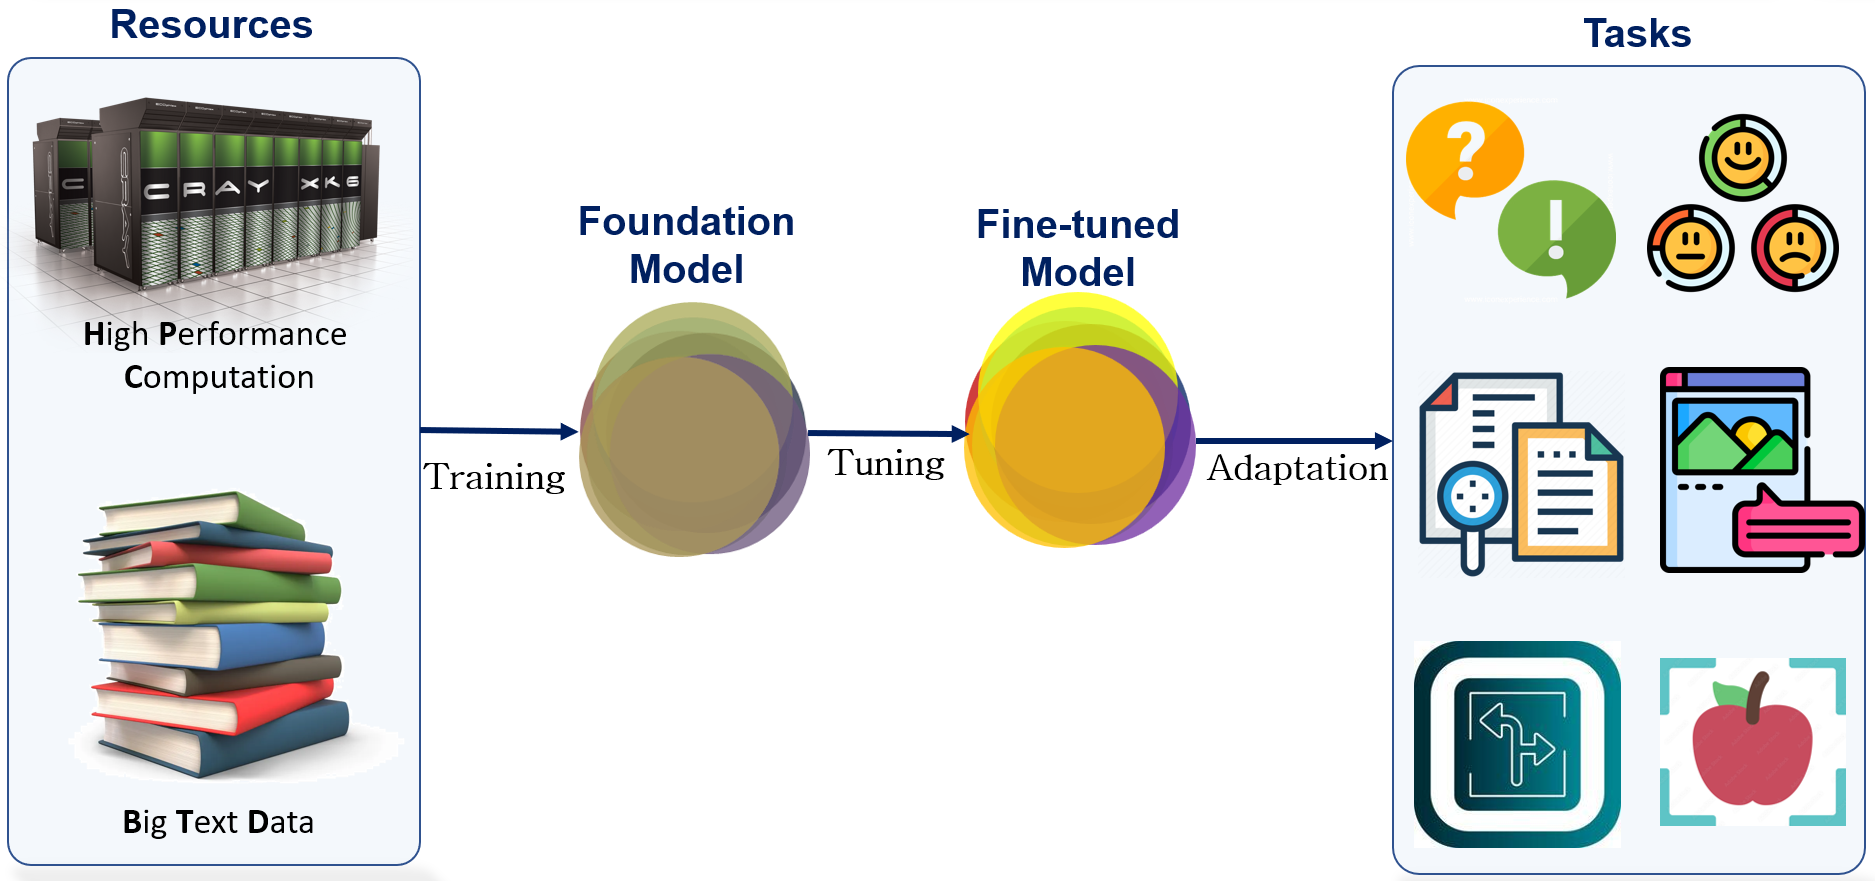

**Zeroshot Prompting**

In [ ]:
# Initialize the model and tokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xl")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xl", device_map="auto")

In [ ]:
# The PROMPT
input_text = "Translate English to German: How old are you?"

# Tokenize the prompt using the tokenizer
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Generate output from the model
outputs = model.generate(input_ids)

# Print the generated output
print(tokenizer.decode(outputs[0]))

In [ ]:
# The PROMPT
input_text = "What is the sum of 19 + 5?"

# Tokenize the prompt using the tokenizer
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Generate output from the model
outputs = model.generate(input_ids)

# Print the generated output
print(tokenizer.decode(outputs[0]))

In [ ]:
# The PROMPT
input_text = "What is the sum of 19 + 5? Provide a step by step explanation."

# Tokenize the prompt using the tokenizer
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Generate output from the model
outputs = model.generate(input_ids)

# Print the generated output
print(tokenizer.decode(outputs[0]))

**Did you know that Zeroshot-LLM + Loop = Chat?**

In [ ]:
# Install required libraries
%pip install -U bitsandbytes

In [ ]:
import torch
from transformers import pipeline
from transformers import pipeline, BitsAndBytesConfig

# How to get an access token?
access_token = ""

In [ ]:
# Understanding the template for prompt
chat = [
    {"role": "system", "content": "You are a friendly tour."},
    {"role": "user", "content": "Hey, can you tell me any fun things to do in New York?"}
]

In [ ]:
# Load full-model with half-precision (16-bit)

pipeline = pipeline(task="text-generation", model="meta-llama/Meta-Llama-3-8B-Instruct", torch_dtype=torch.bfloat16, device_map="auto",token=access_token)
response = pipeline(chat, max_new_tokens=512)
print(response[0]["generated_text"][-1]["content"])

In [ ]:
## Load quantized-model with 8bit-precision

quantization_config = BitsAndBytesConfig(load_in_8bit=True)
pipeline = pipeline(task="text-generation", model="meta-llama/Meta-Llama-3-8B-Instruct", device_map="auto", token=access_token, model_kwargs={"quantization_config": quantization_config})

In [ ]:
# Output the response
response = pipeline(chat, max_new_tokens=512)
print(response[0]["generated_text"][-1]["content"])

In [ ]:
# Append your reply to the prompt template
chat = response[0]["generated_text"]

chat.append(
    {"role": "user", "content": "Wait, Statue of Liberty?"}
)

# Generate responce as per your reply
response = pipeline(chat, max_new_tokens=512)
print(response[0]["generated_text"][-1]["content"])

In [ ]:
# Make this a chat-LLM using just a loop
while True:
    user_input = input("Enter your response (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break  # Exit the loop if the user types 'exit'
    else:
        print("You entered:", user_input)
        chat.append(
            {"role": "user", "content": str(user_input)}
        )
        response = pipeline(chat, max_new_tokens=512)
        print(response[0]["generated_text"][-1]["content"])